# **Google Analytics Capstone Project:**

## A Wellness Technology Company Play It Smart?

## About Bellabeat

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

## Business Task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage. To achieve this, Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

## **1-Ask Phase** - Key Questions to Ask

*   What are the trends identified?
*   How could these trends apply to Bellabeat customers?
*   How could these trends help influence Bellabeat marketing strategy?


## **2-Prepare Phase**

In the Prepare phase, we identify the data being used and its limitations.

*   Data Source
The data is obtained from the following sources:

https://www.kaggle.com/datasets/arashnic/fitbit

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

*   Data Limitations and Integrity - 
    *   Data is collected in 2016, since this analysis is done in 2022 - we can say the data is not current
    *   Data is collecetd by third party survey hence its integrity might not be accertain
    *   The sample size is small and might not be a representative of the whole population



### Data Selection for the task at hand.

*   The **Daily Activity** Dataset is selected for the purpose of this analysis, this is because it contained representative data to be able to analysed and come up with meaningful business insight.
*   The **Python** programming language is going to be the tool to be employed for this analysis.







# **3-Process Phase**

The main objective of this phase is to Clean the data, and prepare the data for analysis.

The following are the tasks to be done here:
*   Explore and observe the date, then check for duplicates, missing values and treat same
*   Cheking for data format and do some data transformation as required
*   Perform statistical analysis and treat further the data as required



## Importing all necessary Libraries

In [47]:
## Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

## Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt # date time

## The following lines are ran to access google drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
daily_activity = pd.read_csv("/content/drive/MyDrive/Daily Data/dailyActivity_merged.csv")

In [49]:
# preview first 5 rows with all columns
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [50]:
# preview last 5 rows with all columns
daily_activity.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [51]:
## Checking the shape of the dataset
daily_activity.shape

(940, 15)

**There are 940 rows and 15 columns in the dataset**

In [7]:
##  The code below gives us details of the columns of the dataset
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  


*   There are 7 floats, 7 integers and 1 Object datatypes in the dataset
*   Activity date is an object type data here which is not correct and needs to be change to date type.


In [52]:
## This code is used to check any for duplicates in each rows of the columns in the dataset
daily_activity[daily_activity.duplicated()].count()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There is no duplicate values in the dataset

In [53]:
## Checking for missing values in the dataset
daily_activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

No missing values either

In [54]:
## Checking the distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
unique_id

33

There are 33 unique ids in the dataset

### **Formating and tranforming dataset**

In [55]:
## convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

## Check data info again to confirm
daily_activity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

the activity date has been transformed to the correct data type

In [56]:
##Re-arranging the columns and renaming the dataframe
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']


df_activity = daily_activity.reindex(columns=new_cols)

# Check the dataframe again after rearranging the columns
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [57]:
## create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

## Show first 7 rows to confirm the day of the week
df_activity["DayOfTheWeek"].head(7)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
Name: DayOfTheWeek, dtype: object

In [58]:
## rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)

df_activity.head(7)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863
5,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,NaN,NaN,1728
6,1503960366,2016-04-18,Monday,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,NaN,NaN,1921


In [59]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]


In [60]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)



In [61]:
##Once again lets check the data frame again
df_activity.head()

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


# **4-Analyze Phase**

After processing the data, we need to analyse the date further before we go into the data visualization aspect where we share our analysis to the stakeholders in various form (main graphical).

In order to perfrom this analysis, we need to get the statistical summary of the final process data.


In [62]:
# Checking the statistical summary after formating the data
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


### The following is the take out from the statistical summary analysis
*   The avarage calories burnt is 2,303
*   The summary shows users logged 7,637 steps or 5.4km which is lower than what is recommended average of 10,000 steps daily for an adult female.
*   Sedentary users form the majority users representing about 81% of the total


# **5-Share Phase**

*   **Data Visualization and Observations**




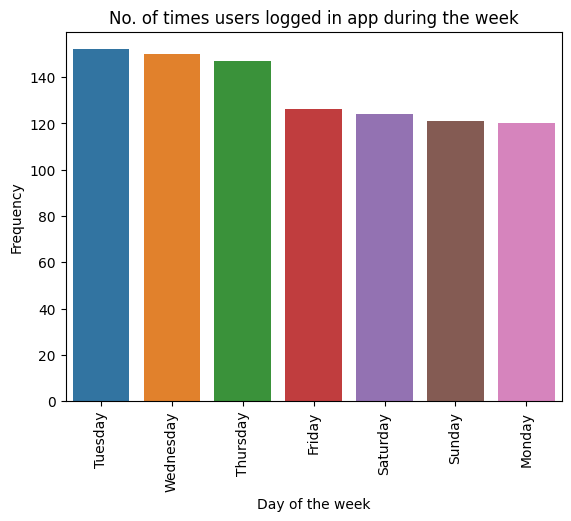

In [69]:
sns.countplot(data=df_activity, x='day_of_the_week')
plt.xticks(rotation=90)

plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app during the week")
plt.grid(False)
plt.show()

## Observation


**In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.**
*   Tuesday, Wednesday and Thursday are the days with the highest number of loggings.
*   There is a general drop in app loggings during the weekends, especially.


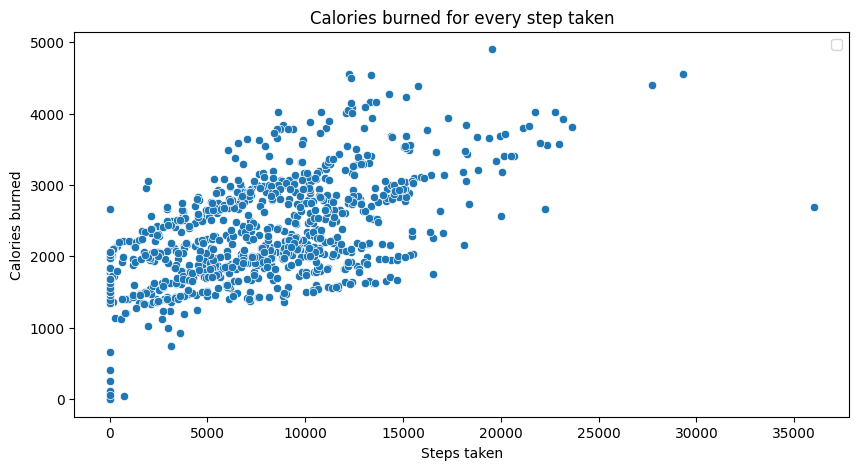

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_activity,x='total_steps',y='calories')

plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(False)
plt.legend()
plt.show()


## Observations



*    The correlation between the calories burnt and step taken is positive, that means they are directly proportional to each other
*    From 0 to 15,000 steps the rate of colories burnts is high this rate flatenned a bit as the number of steps goes beyond 15,000 daily.









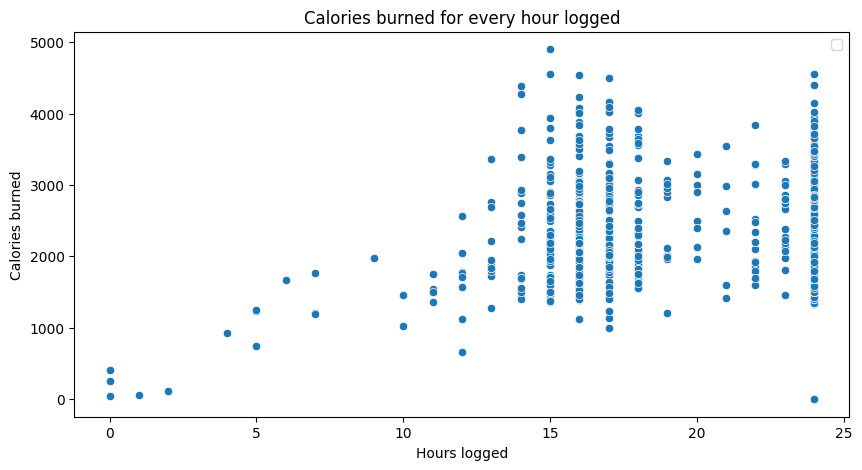

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_activity,x='total_hours',y='calories')

plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(False)
plt.show()

## Observation

*       Here the corellation seems positive but one can say a weak positive correlation, at lower hours increase hours logged seems to have direct impact calories burnts. But later on as hours increases this is not the case anymore. 














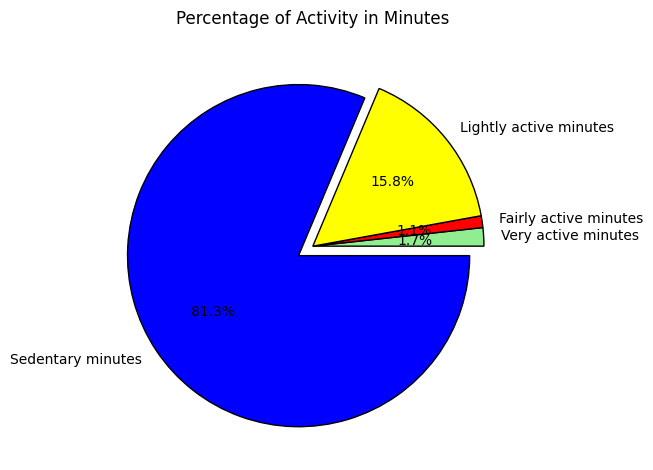

In [30]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightgreen", "red", "yellow", "blue"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

## Observation

*   Sedentary minutes takes the biggest slice at 81.3%.
*   This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements or running errands.
*   App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.



# **6-ACT Phase:** - Recommendation and Business Insights

This final step steps will answer exactly the business Questions highlighted at the begining:


1.   What are the trends identified?
    *   The FitBit app is not used primarily to track fitness or health related habit as can be seen by about 81% usage on sedentary activities.
    *   Also most of the app usages comes in the middle of weekdays, as we are approching weekend and the begining of the work week, usage is low. This might not be unconnected with people engaging on somany activities over weekend and give little attention to their fitness needs.
    *   Low usage begining of the week might be related by users getting overly busy with early week schedule and towards weekend with weekend euphoria
2.   How could these trends apply to Bellabeat customers?
    *   Since both companies provide products to same target audience, then these analysis can be directly applied to Bellabeat customers as well and can be used to tailor marketting campaigns. 
1.   How could these trends help influence Bellabeat marketing strategy?
    *   Since the trend is established which can be applied to Bellabeat customers as well, the marketing team can use the take out from this analysis for that, for example - tailored reminders can be sent towards weekend to remind users about the importance of fitness and nutrician tips
    *   During the midweek, encouraging messages can be sent to users as well.





